Accuracy: 0.9625
Precision: 0.9333333333333333
Recall: 1.0


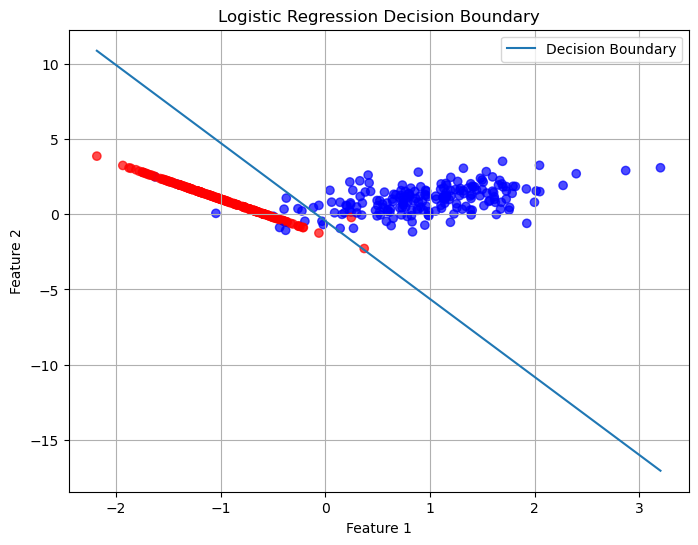

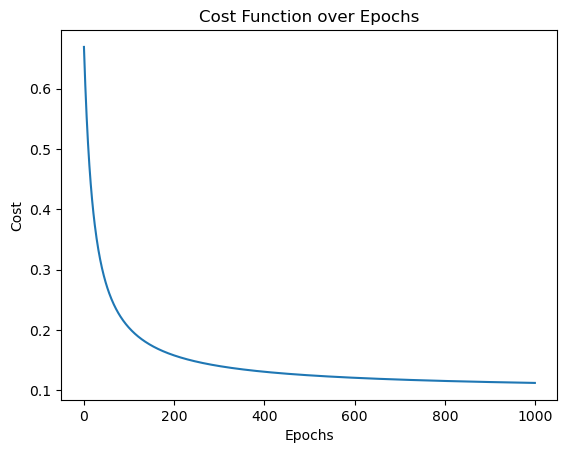

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (fixed)
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = (-np.multiply(y, np.log(h)) - np.multiply((1 - y), np.log(1 - h))) / m
    return cost.sum()

# Gradient Descent
def gradient_descent(X, y, weights, lr, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (X.T @ (h - y)) / m
        weights -= lr * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Prediction
def predict(X, weights):
    probs = sigmoid(X @ weights)
    return (probs >= 0.5).astype(int)

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Add bias term (intercept)
X = np.c_[np.ones((X.shape[0], 1)), X]

# Ensure y is column vector
y = y.reshape(-1, 1)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights
weights = np.zeros((X.shape[1], 1))

# Train model
weights, cost_history = gradient_descent(X_train, y_train, weights, lr=0.1, epochs=1000)

# Predict
y_pred = predict(X_test, weights)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, weights):
    x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x2 = -(weights[0] + weights[1]*x1) / weights[2]

    plt.figure(figsize=(8,6))
    plt.plot(x1, x2, label="Decision Boundary")
    plt.scatter(X[:,1], X[:,2], c=y.ravel(), cmap='bwr', alpha=0.7)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Logistic Regression Decision Boundary")
    plt.grid(True)
    plt.show()
   
plot_decision_boundary(X, y, weights)


plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()
